In [ ]:
 #import libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
#!pip install wordcloud 
#import wordcloud package
import wordcloud

In [ ]:
#import inaugural package/library
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


In [ ]:
#make a dataframe of the three speeches
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [ ]:
inaugural_speech

,president,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


# 2.1 Find the number of characters, words and sentences for the mentioned documents

## Number of characters

In [ ]:
# get length of each speech 
#add a new column called "char_count" in the dataframe
inaugural_speech['char_count'] = inaugural_speech['text'].str.len() ## this also includes spaces
inaugural_speech

,president,text,char_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


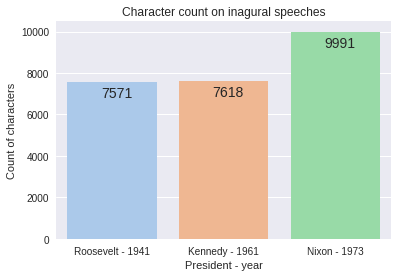

In [ ]:
#plot the characters count of each speech
plt.figure(figsize=(6,4))
ax = sns.barplot(y='char_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Character count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of characters')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14)

## Number of words

In [ ]:
#split words and get their count
#add a new column called "word_count" in the dataframe
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,president,text,char_count,word_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


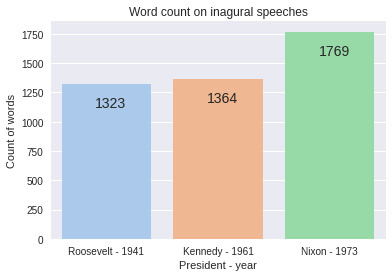

In [ ]:
#plot the words count of each speech

plt.figure(figsize=(6,4))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Word count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

## Number of sentences

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#use sentence tokenize library to get the count of sentences in each speech
#add a new column called "sents_count" in the dataframe

from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


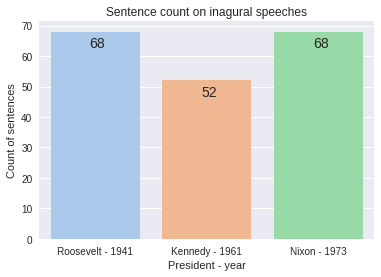

In [ ]:
#plot the sentences count of each speech

plt.figure(figsize=(6,4))
ax = sns.barplot(y='sents_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Sentence count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of sentences')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14)

# 2.2 Remove all the stopwords from the three speeches

In [ ]:
# Lower case conversion for all words
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

In [ ]:
# Remove punctuation
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [ ]:
#import stop words library
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall'] #add these to the stop words
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# remove the stop words from the three speeches
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,7571,1323,68
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,7618,1364,52
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,9991,1769,68


Print the three speeches after stop words removal

In [ ]:
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [ ]:
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [ ]:
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [ ]:
# Use pd.series and value counts to get top three words
#value_counts() function returns object containing counts of unique values
# Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.)
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:3]
freq

nation       11
know         10
democracy     9
dtype: int64

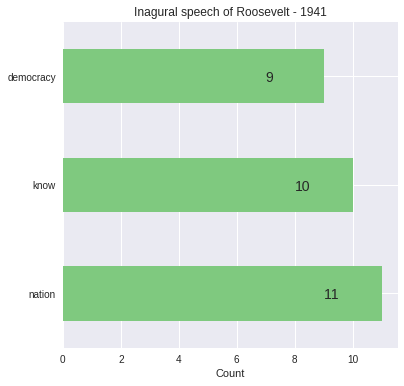

In [ ]:
#plot top three words and their counts
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Accent')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [ ]:
# Use pd.series and value counts to get top three words
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:4]
freq

world     8
sides     8
pledge    7
dtype: int64

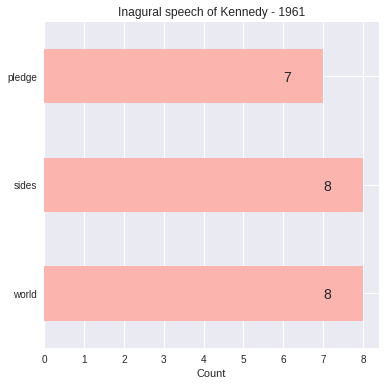

In [ ]:
#plot top three words and their counts
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Pastel1')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

In [ ]:
# Use pd.series and value counts to get top three words
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:3]
freq

peace    19
world    16
new      15
dtype: int64

# 2.4  Plot the word cloud of each of the three speeches. (after removing the stopwords)

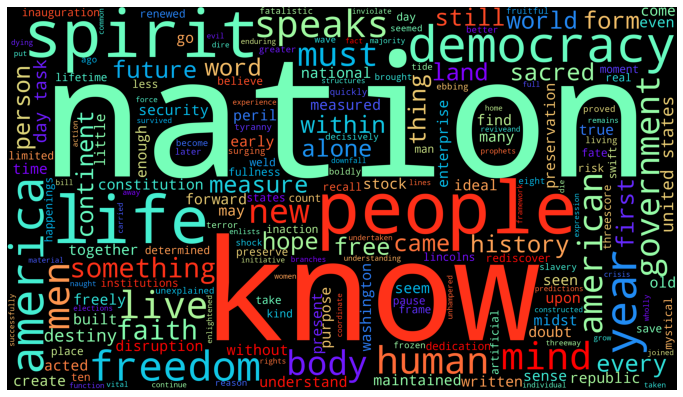

In [ ]:
#import word cloud library and plot the word cloud for each speech
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

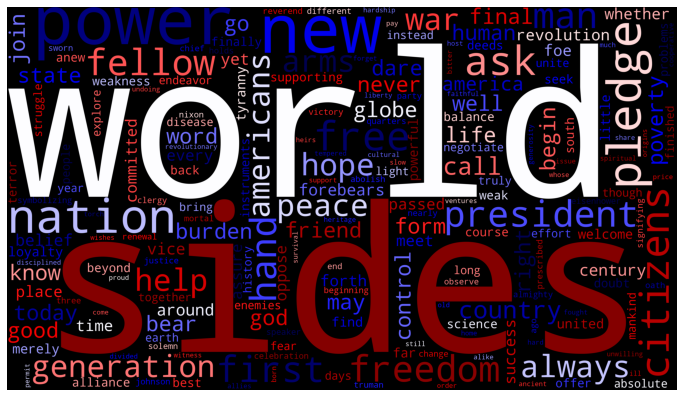

In [ ]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

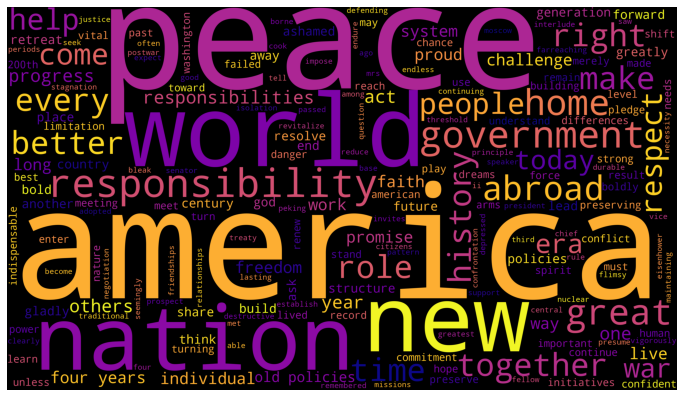

In [ ]:
0